#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Data

In [3]:
df=pd.read_csv(r"/content/Amazon Sale Report.csv",encoding="latin-1")
df.head() #Checking the first 5 rows.

<ipython-input-3-0b5d3c599af3>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"/content/Amazon Sale Report.csv",encoding="latin-1")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


#Cleaning Data

In [4]:
#Checking number of rows and columns.
df.shape

(56938, 21)

In [5]:
df.tail() #Checking the last 5 rows.

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
56933,56932,405-1061959-2438738,05-25-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,...,INR,493.0,Bangalore,KARNATAKA,560036.0,IN,False,NaN,NaN,NaN
56934,56933,405-2361514-2287560,05-25-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,XL,Shipped,...,INR,599.0,MUMBAI,MAHARASHTRA,400078.0,IN,False,NaN,NaN,NaN
56935,56934,408-6159119-1449106,05-25-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,499.0,GHAZIABAD,UTTAR PRADESH,201002.0,IN,False,NaN,NaN,NaN
56936,56935,408-8552934-2101155,05-25-22,Cancelled,Amazon,Amazon.in,Expedited,Trousers,XL,Cancelled,...,NaN,NaN,NEW TOWN,WEST BENGAL,700156.0,IN,False,NaN,NaN,NaN
56937,56936,408-4103938-9625932,05-25-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking all colums datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56938 entries, 0 to 56937
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               56938 non-null  int64  
 1   Order ID            56938 non-null  object 
 2   Date                56938 non-null  object 
 3   Status              56937 non-null  object 
 4   Fulfilment          56937 non-null  object 
 5   Sales Channel       56937 non-null  object 
 6   ship-service-level  56937 non-null  object 
 7   Category            56937 non-null  object 
 8   Size                56937 non-null  object 
 9   Courier Status      56937 non-null  object 
 10  Qty                 56937 non-null  float64
 11  currency            53478 non-null  object 
 12  Amount              53478 non-null  float64
 13  ship-city           56922 non-null  object 
 14  ship-state          56922 non-null  object 
 15  ship-postal-code    56922 non-null  float64
 16  ship

In [7]:
#drop unrelated/blank columns
df.drop(["New","PendingS"], axis=1,inplace=True)

In [8]:
# checking null value
pd.isnull(df)
# Checking the total number of null values
pd.isnull(df).sum()

,0
index,0
Order ID,0
Date,0
Status,1
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,1
Size,1
Courier Status,1


In [9]:
#drop all null values
df.dropna(inplace=True)

In [10]:
df.shape

(16702, 19)

In [11]:
#Seeing all column names
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [12]:
# changing data type of pincode to int
df["ship-postal-code"]=df["ship-postal-code"].astype("int")

In [13]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [14]:
df.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


In [15]:
df["Date"]=pd.to_datetime(df["Date"])

<ipython-input-15-eb7c99974807>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"])


In [16]:
df["Date"].dtypes

dtype('<M8[ns]')

In [17]:
# renaming Columns
df.rename(columns={"Qty":"Quantity"})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1.0,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1.0,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56913,56912,403-8661681-9882724,2022-05-25,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,1.0,INR,885.00,SECUNDERABAD,TELANGANA,500011,IN,False,Easy Ship
56918,56917,405-5635525-9886705,2022-05-25,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XS,Shipped,1.0,INR,420.00,NEW DELHI,DELHI,110092,IN,False,Easy Ship
56924,56923,171-1994055-7082749,2022-05-25,Cancelled,Merchant,Amazon.in,Standard,T-shirt,M,On the Way,0.0,INR,1359.82,FAIZABAD,UTTAR PRADESH,224001,IN,False,Easy Ship
56925,56924,403-8993734-8533905,2022-05-25,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1.0,INR,574.00,INDORE,MADHYA PRADESH,452001,IN,False,Easy Ship


In [18]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,16702.000000,16702,16702.000000,16702.000000,16702.000000
mean,25499.464675,2022-04-20 17:10:22.919411200,0.865166,617.488738,460259.093821
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,11917.500000,2022-04-11 00:00:00,1.000000,442.000000,332001.000000
50%,23513.000000,2022-04-19 00:00:00,1.000000,574.000000,500003.000000
75%,38077.500000,2022-04-25 00:00:00,1.000000,744.000000,600044.000000
max,56931.000000,2022-05-31 00:00:00,5.000000,5495.000000,989898.000000
std,15615.372879,NaN,0.356314,272.546867,197934.801998


In [19]:
df.describe(include="object")

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702
unique,15385,8,1,1,1,8,11,2,1,2863,52,1,2,1
top,404-9932919-6662730,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,11,13368,16702,16702,16702,7023,3114,14384,16702,1193,2827,16702,16558,16702


In [21]:
#use describe() for specific columns
df[["Qty","Amount"]].describe()

,Qty,Amount
count,16702.000000,16702.000000
mean,0.865166,617.488738
std,0.356314,272.546867
min,0.000000,0.000000
25%,1.000000,442.000000
50%,1.000000,574.000000
75%,1.000000,744.000000
max,5.000000,5495.000000


#**Exploratory Data Analysis**

In [22]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

#Product Analysis

#Size

<ipython-input-68-ae1383a78b1d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Size",data=df,palette="flare")


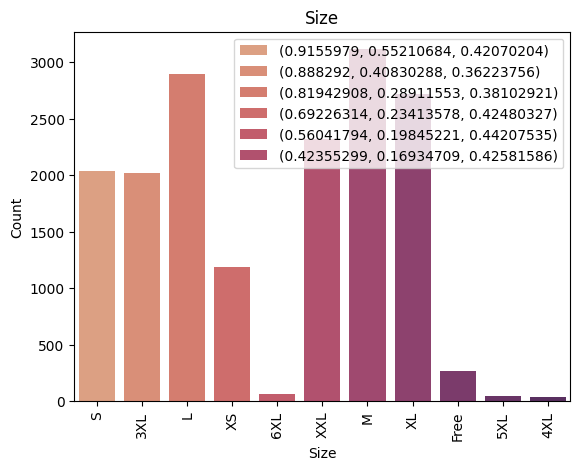

In [68]:
ax=sns.countplot(x="Size",data=df,palette="flare")
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Size")
plt.xticks(rotation=90)
plt.show()

<ipython-input-65-c29f5b33472e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Size",data=df,palette="flare")


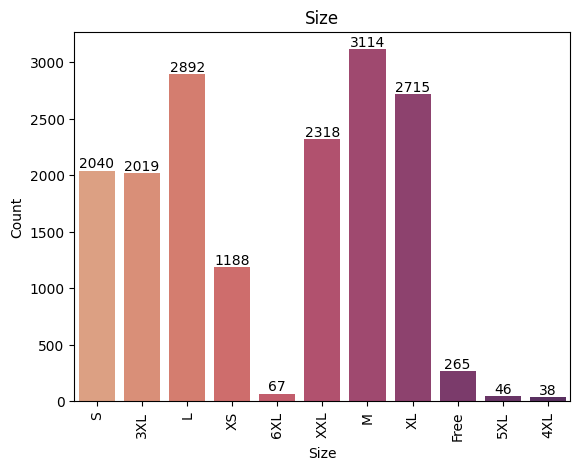

In [65]:
ax=sns.countplot(x="Size",data=df,palette="flare")
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Size")
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

***Note: From the above graph you can see highest selling is M-Size***

In [25]:
df.groupby(["Size"],as_index=False)["Qty"].sum().sort_values(by="Qty",ascending=False)

,Size,Qty
6,M,2686.0
5,L,2519.0
8,XL,2352.0
10,XXL,2018.0
0,3XL,1777.0
7,S,1752.0
9,XS,992.0
4,Free,222.0
3,6XL,59.0
2,5XL,40.0


from matplotlib import pyplot as plt
_df_5['Qty'].plot(kind='hist', bins=20, title='Qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Qty'].plot(kind='line', figsize=(8, 4), title='Qty')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-64-bd6e79ee792f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Size",y="Qty",data=S_Qty,palette="flare")


<Axes: xlabel='Size', ylabel='Qty'>

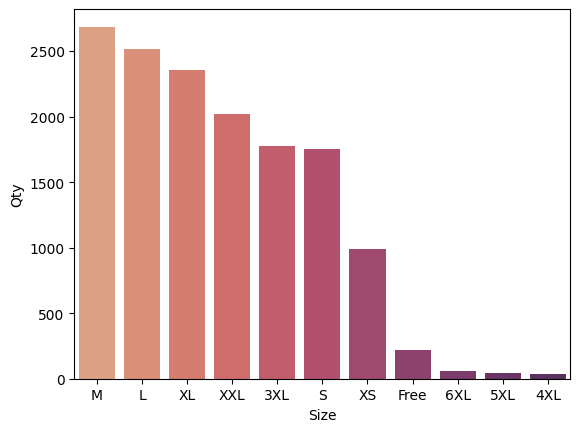

In [64]:
S_Qty=df.groupby(["Size"],as_index=False)["Qty"].sum().sort_values(by="Qty",ascending=False)
sns.barplot(x="Size",y="Qty",data=S_Qty,palette="flare")

**Note : From above chart we can see highest buys are from M-Size**

#Couier Status

In [28]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

<Axes: xlabel='Courier Status', ylabel='count'>

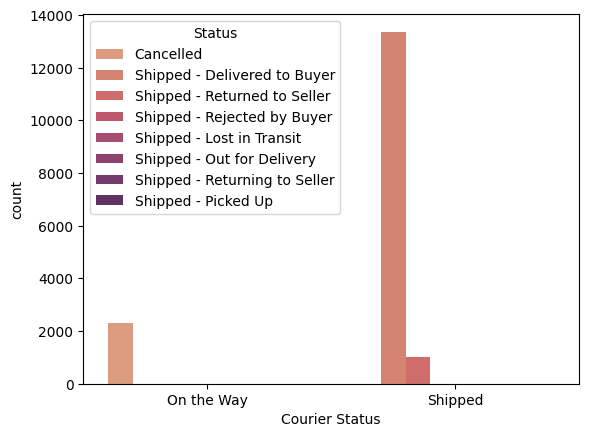

In [63]:
sns.countplot(data=df,x='Courier Status',hue="Status",palette="flare")

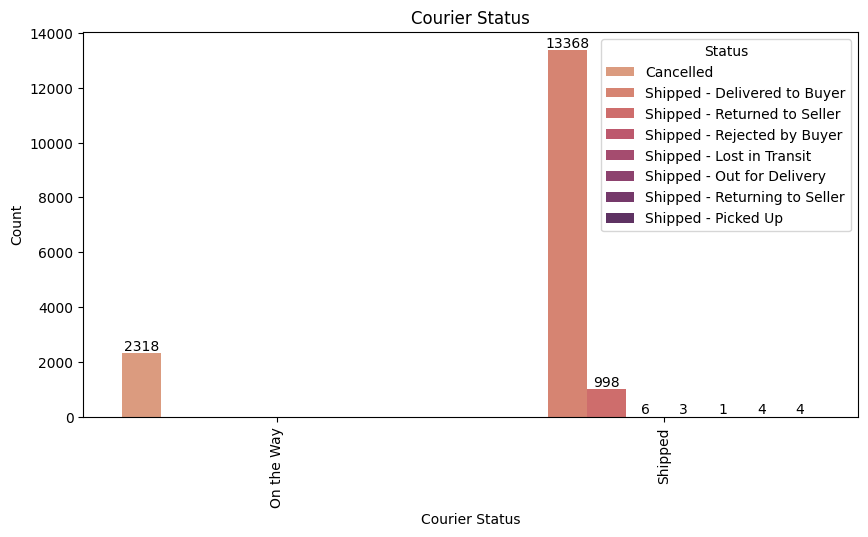

In [62]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Courier Status',hue="Status",palette="flare")
plt.xlabel("Courier Status")
plt.ylabel("Count")
plt.title("Courier Status")
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Note: From the above graph we can see majority of the orders are shipped through courier**

<Axes: >

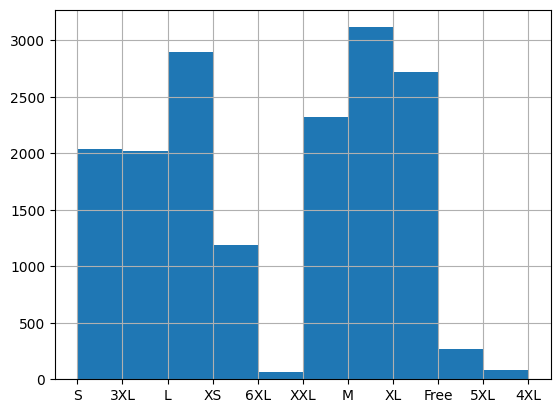

In [31]:
#histogram
df["Size"].hist()

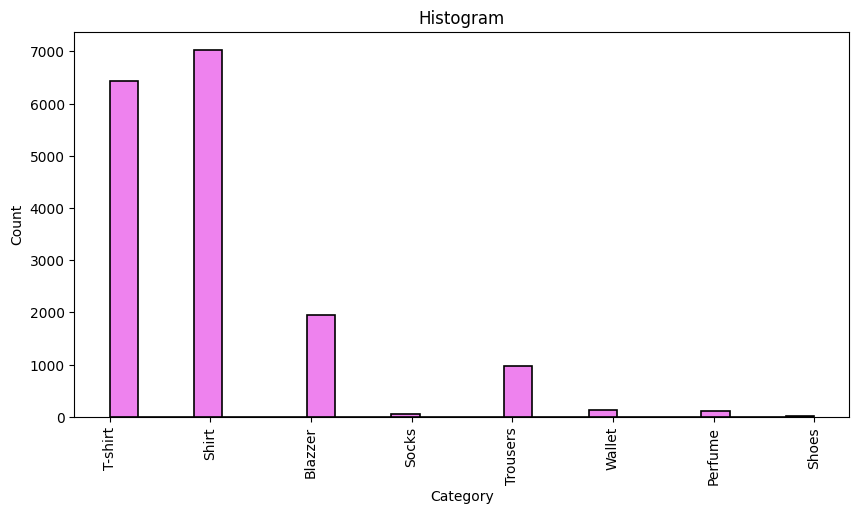

In [61]:
df["Category"]=df["Category"].astype(str)
Column_data=df["Category"]
plt.figure(figsize=(10,5))
plt.hist(Column_data,bins=25,edgecolor="Black",linewidth=1.2,color="violet")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Histogram")
plt.xticks(rotation=90)
plt.show()

**Note: you can see from the above graph that most of the buys are for T-shirt**

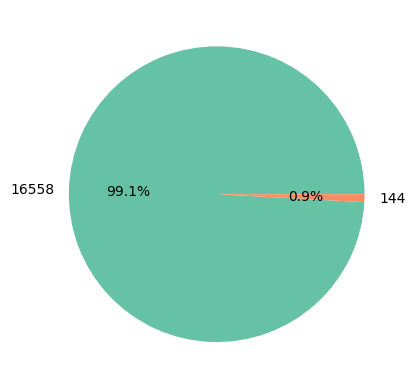

In [59]:
# Checking B2B Data  by using pie chart
B2B_Check=df["B2B"].value_counts()

# Plot the pie chart
plt.pie(B2B_Check,labels=B2B_Check,autopct="%1.1f%%",colors=sns.color_palette("Set2"))
#plt.axis("equal")
plt.show()

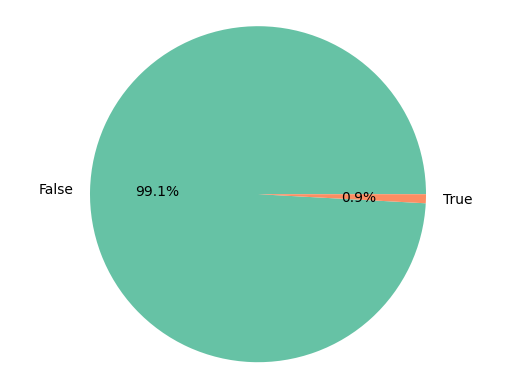

In [60]:
# Checking B2B Data by using pie chart
B2B_Check=df["B2B"].value_counts()

# Plot the pie chart
plt.pie(B2B_Check,labels=B2B_Check.index,autopct="%1.1f%%",colors=sns.color_palette("Set2"))
plt.axis("equal")
plt.show()

**Note: From the above chart we can see the maximum buyers are retailers with 99.1% and B2B at lowest with 0.9%**

#Fulfilment Analysis

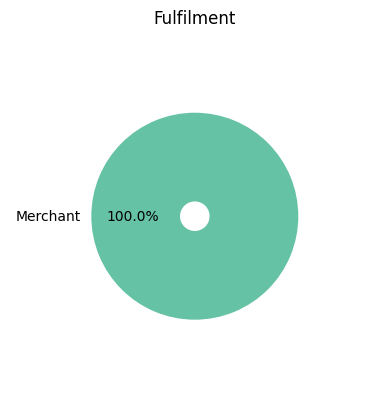

In [53]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6),colors=sns.color_palette("Set2"))
ax.set_title('Fulfilment')
ax.set(aspect="equal")

plt.show()

**Note: From above chart you can see that most of the Fulfilment are amazon**

#Customer Segmentation

Text(0.5, 1.0, 'Scatter Plot')

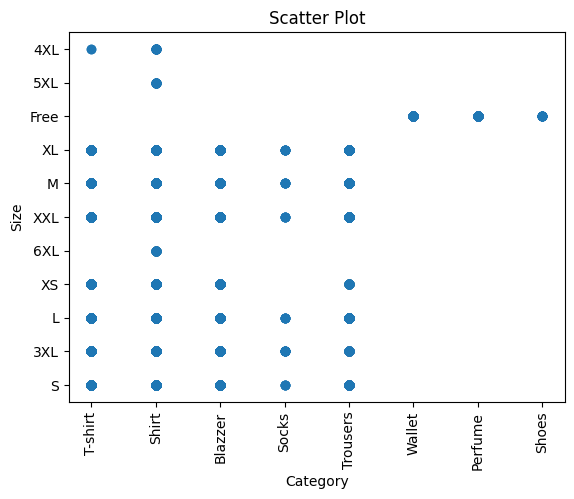

In [55]:
# Prepare date for scatter plot
x_data=df["Category"]
y_data=df["Size"]

# Plot the Scatter plot
plt.scatter(x_data,y_data)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Size")
plt.title("Scatter Plot")

# Geographical Analysis

In [37]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

<ipython-input-42-e50d962b3682>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="ship-state",palette="flare")


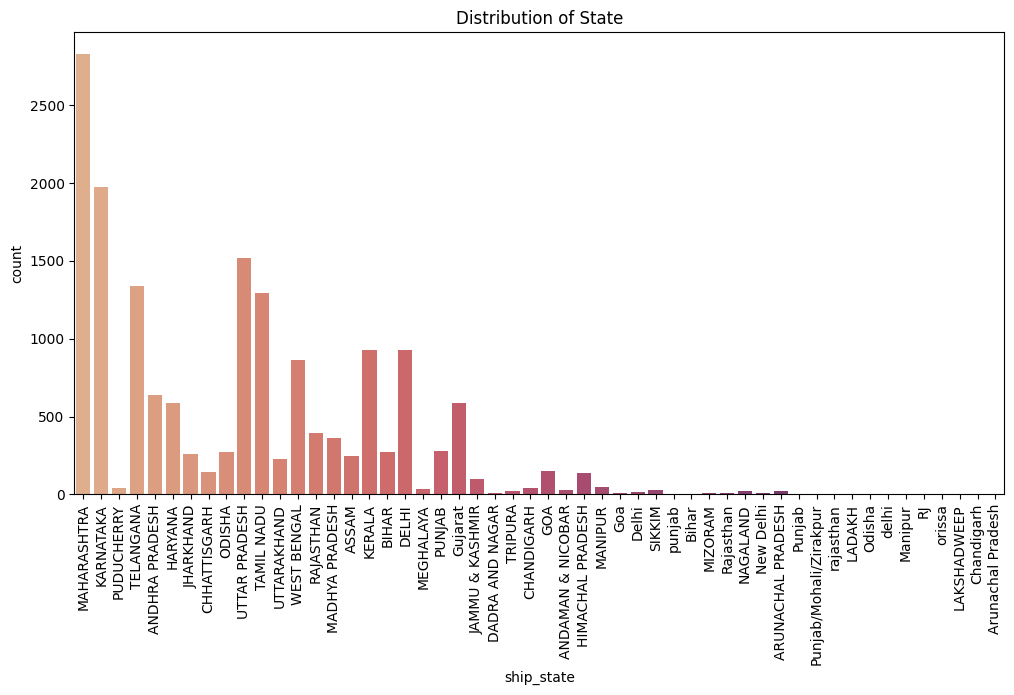

In [42]:
# Plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="ship-state",palette="flare")
plt.xlabel("ship_state")
plt.ylabel("count")
plt.title("Distribution of State")
plt.xticks(rotation=90)
plt.show()

<ipython-input-41-7b3793a39dab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["ship-state"].isin(top_10_states.index)],x="ship-state",palette="flare")


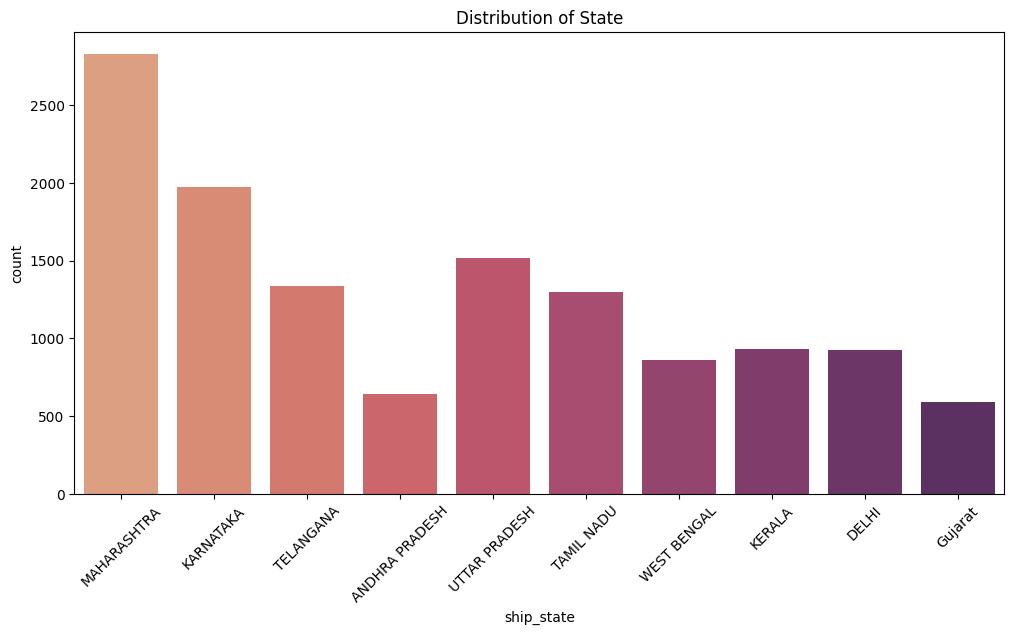

In [41]:
# Top 10 States
top_10_states=df["ship-state"].value_counts().head(10)

# Plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df[df["ship-state"].isin(top_10_states.index)],x="ship-state",palette="flare")
plt.xlabel("ship_state")
plt.ylabel("count")
plt.title("Distribution of State")
plt.xticks(rotation=45)
plt.show()

**Note: From the above graph ypu can see most buyers are from Maharastra state**

#Business Insights

The data analysis reveals that the busines has a significant base in Maharastra state and mainly serves retailers, fulfills orders through amazon, experiences high demaind for T-Shirts where M-Size is the most prefered by the customers